In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=597750d22dc7f090c792dee9b9eefc3d


In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


622

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | little current
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | kavieng
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | wonthaggi
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | lorengau
Processing Record 17 of Set 1 | codrington
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | geraldton
Processing Record 21 of Set 1 | kalmar
Processing Record 22 of Set 1 | panaba
Process

Processing Record 36 of Set 4 | qaanaaq
Processing Record 37 of Set 4 | haines junction
Processing Record 38 of Set 4 | goderich
Processing Record 39 of Set 4 | coracao de jesus
Processing Record 40 of Set 4 | marsh harbour
Processing Record 41 of Set 4 | saleaula
City not found. Skipping...
Processing Record 42 of Set 4 | praya
Processing Record 43 of Set 4 | sainthia
Processing Record 44 of Set 4 | georgetown
Processing Record 45 of Set 4 | stornoway
Processing Record 46 of Set 4 | severo-kurilsk
Processing Record 47 of Set 4 | diamantino
Processing Record 48 of Set 4 | vredendal
Processing Record 49 of Set 4 | jabiru
City not found. Skipping...
Processing Record 50 of Set 4 | pingliang
Processing Record 1 of Set 5 | coquimbo
Processing Record 2 of Set 5 | evensk
Processing Record 3 of Set 5 | luderitz
Processing Record 4 of Set 5 | grimari
City not found. Skipping...
Processing Record 5 of Set 5 | adwa
Processing Record 6 of Set 5 | altay
Processing Record 7 of Set 5 | the valley
Pr

Processing Record 24 of Set 8 | upernavik
Processing Record 25 of Set 8 | panguna
Processing Record 26 of Set 8 | sistranda
Processing Record 27 of Set 8 | katsuura
Processing Record 28 of Set 8 | port-gentil
Processing Record 29 of Set 8 | sarahan
Processing Record 30 of Set 8 | lavrentiya
Processing Record 31 of Set 8 | gualaca
Processing Record 32 of Set 8 | salekhard
Processing Record 33 of Set 8 | gorom-gorom
Processing Record 34 of Set 8 | matagami
Processing Record 35 of Set 8 | poyarkovo
Processing Record 36 of Set 8 | hibbing
Processing Record 37 of Set 8 | vestmanna
Processing Record 38 of Set 8 | nelson bay
Processing Record 39 of Set 8 | paamiut
Processing Record 40 of Set 8 | kuito
Processing Record 41 of Set 8 | kalmunai
Processing Record 42 of Set 8 | namibe
Processing Record 43 of Set 8 | colares
Processing Record 44 of Set 8 | kropotkin
Processing Record 45 of Set 8 | bulungu
Processing Record 46 of Set 8 | saint george
Processing Record 47 of Set 8 | karkaralinsk
City

Processing Record 9 of Set 12 | hobyo
Processing Record 10 of Set 12 | maetaguse
City not found. Skipping...
Processing Record 11 of Set 12 | soe
Processing Record 12 of Set 12 | buluang
Processing Record 13 of Set 12 | umm durman
City not found. Skipping...
Processing Record 14 of Set 12 | mitu
Processing Record 15 of Set 12 | isla mujeres
Processing Record 16 of Set 12 | duldurga
Processing Record 17 of Set 12 | kyshtovka
Processing Record 18 of Set 12 | baghdad
Processing Record 19 of Set 12 | murray bridge
Processing Record 20 of Set 12 | ozgon
City not found. Skipping...
Processing Record 21 of Set 12 | tarauaca
Processing Record 22 of Set 12 | yerbogachen
Processing Record 23 of Set 12 | zinacantan
Processing Record 24 of Set 12 | kieta
Processing Record 25 of Set 12 | ust-kuyga
Processing Record 26 of Set 12 | kant
Processing Record 27 of Set 12 | garango
Processing Record 28 of Set 12 | ivdel
Processing Record 29 of Set 12 | kempsey
Processing Record 30 of Set 12 | molteno
Proc

In [9]:
len(city_data)

559

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.8667,113.6333,78.87,65,0,17.27,AU,2021-12-10 02:20:46
1,Thompson,55.7435,-97.8558,1.56,78,90,10.36,CA,2021-12-10 02:16:12
2,Little Current,45.9793,-81.9248,32.09,94,100,17.43,CA,2021-12-10 02:20:47
3,Bethel,41.3712,-73.4140,34.05,72,75,3.44,US,2021-12-10 02:20:47
4,Kavieng,-2.5744,150.7967,84.47,78,99,15.23,PG,2021-12-10 02:16:00
5,Rikitea,-23.1203,-134.9692,76.10,73,64,19.42,PF,2021-12-10 02:20:47
6,Wonthaggi,-38.6044,145.5913,68.94,68,48,10.07,AU,2021-12-10 02:20:48
7,Vaini,-21.2000,-175.2000,84.36,79,20,10.36,TO,2021-12-10 02:20:48
8,Busselton,-33.6500,115.3333,74.08,61,97,11.97,AU,2021-12-10 02:16:01
9,Hobart,-42.8794,147.3294,63.01,70,75,3.00,AU,2021-12-10 02:20:49


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Carnarvon,AU,2021-12-10 02:20:46,-24.8667,113.6333,78.87,65,0,17.27
1,Thompson,CA,2021-12-10 02:16:12,55.7435,-97.8558,1.56,78,90,10.36
2,Little Current,CA,2021-12-10 02:20:47,45.9793,-81.9248,32.09,94,100,17.43
3,Bethel,US,2021-12-10 02:20:47,41.3712,-73.4140,34.05,72,75,3.44
4,Kavieng,PG,2021-12-10 02:16:00,-2.5744,150.7967,84.47,78,99,15.23
5,Rikitea,PF,2021-12-10 02:20:47,-23.1203,-134.9692,76.10,73,64,19.42
6,Wonthaggi,AU,2021-12-10 02:20:48,-38.6044,145.5913,68.94,68,48,10.07
7,Vaini,TO,2021-12-10 02:20:48,-21.2000,-175.2000,84.36,79,20,10.36
8,Busselton,AU,2021-12-10 02:16:01,-33.6500,115.3333,74.08,61,97,11.97
9,Hobart,AU,2021-12-10 02:20:49,-42.8794,147.3294,63.01,70,75,3.00


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1639103779.1660001

In [16]:
today = time.strftime("%x")
today

'12/09/21'

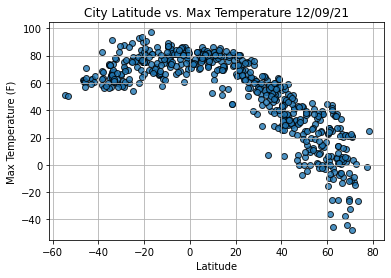

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

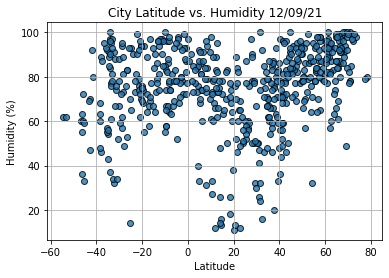

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


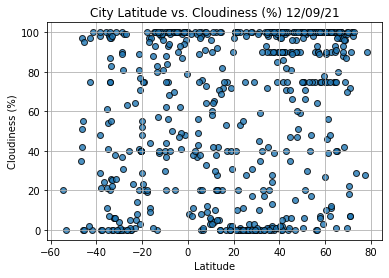

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

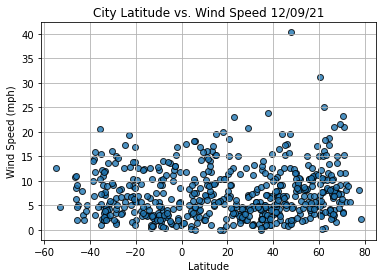

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2021-12-10 02:20:50
Lat                      -46.1927
Lng                      168.8643
Max Temp                    61.48
Humidity                       36
Cloudiness                     51
Wind Speed                   6.24
Name: 13, dtype: object

In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

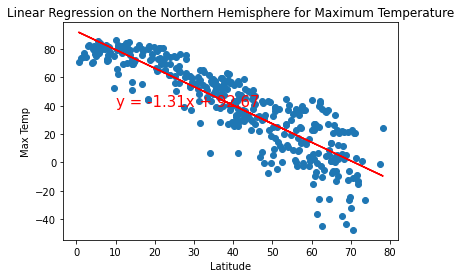

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

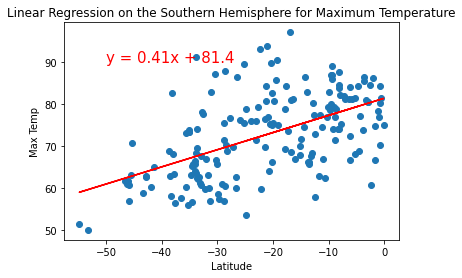

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

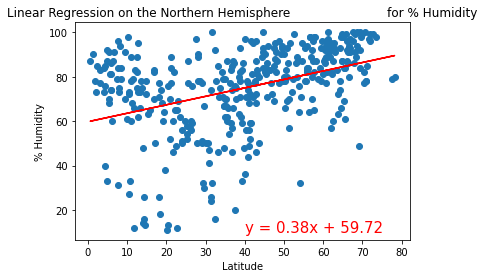

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

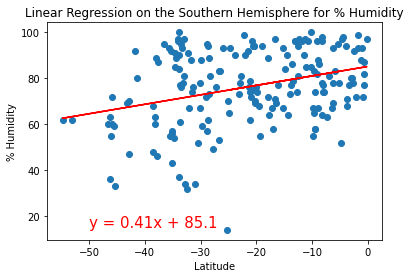

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

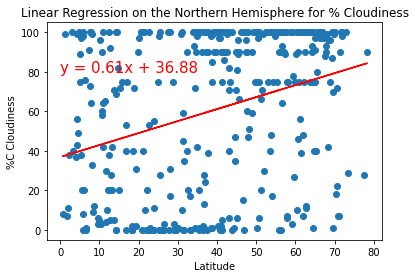

In [43]:
#Linear regression on the northern hemisphere for % cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for % Cloudiness', '%C Cloudiness', (0,80))

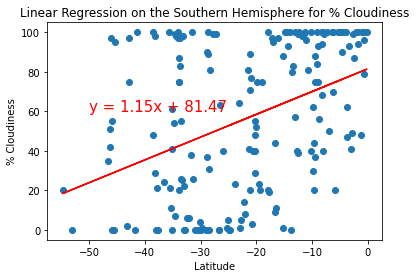

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

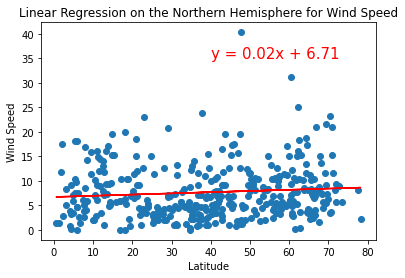

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

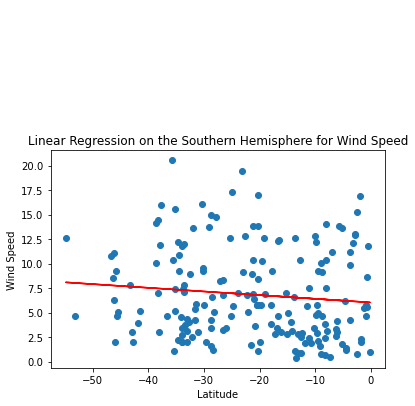

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))